# IMDB Movie Review Sentiment Analysis Using LSTM

In [ ]:
# Importing the dataset
from keras.datasets import imdb

# Parameters: Using top 20K words; no skipping; no initial max length filter
VOCAB_SIZE = 20000
SKIP_COUNT = 0
MAX_LENGTH = None

# Loading dataset
print("Loading the IMDB dataset...")
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=VOCAB_SIZE, skip_top=SKIP_COUNT, maxlen=MAX_LENGTH)
print("Dataset loaded!")

Loading the IMDB dataset...
17464789/17464789 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Dataset loaded!


In [ ]:
print("Size of training set :", len(train_data))
print("Size of test set     :", len(test_data))

Size of training set : 25000
Size of test set     : 25000


In [ ]:
print("Sample training example:")
print(train_data[3])
print("Label:")
print(train_labels[3])

Sample training example:
[1, 4, 18609, 16085, 33, 2804, 4, 2040, 432, 111, 153, 103, 4, 1494, 13, 70, 131, 67, 11, 61, 15305, 744, 35, 3715, 761, 61, 5766, 452, 9214, 4, 985, 7, 2, 59, 166, 4, 105, 216, 1239, 41, 1797, 9, 15, 7, 35, 744, 2413, 31, 8, 4, 687, 23, 4, 2, 7339, 6, 3693, 42, 38, 39, 121, 59, 456, 10, 10, 7, 265, 12, 575, 111, 153, 159, 59, 16, 1447, 21, 25, 586, 482, 39, 4, 96, 59, 716, 12, 4, 172, 65, 9, 579, 11, 6004, 4, 1615, 5, 2, 7, 5168, 17, 13, 7064, 12, 19, 6, 464, 31, 314, 11, 2, 6, 719, 605, 11, 8, 202, 27, 310, 4, 3772, 3501, 8, 2722, 58, 10, 10, 537, 2116, 180, 40, 14, 413, 173, 7, 263, 112, 37, 152, 377, 4, 537, 263, 846, 579, 178, 54, 75, 71, 476, 36, 413, 263, 2504, 182, 5, 17, 75, 2306, 922, 36, 279, 131, 2895, 17, 2867, 42, 17, 35, 921, 18435, 192, 5, 1219, 3890, 19, 2, 217, 4122, 1710, 537, 2, 1236, 5, 736, 10, 10, 61, 403, 9, 2, 40, 61, 4494, 5, 27, 4494, 159, 90, 263, 2311, 4319, 309, 8, 178, 5, 82, 4319, 4, 65, 15, 9225, 145, 143, 5122, 12, 7039, 537, 7

In [ ]:
# Create mapping for words and convert sample review to text
word_to_index = imdb.get_word_index()
index_to_word = dict ( [(idx, word) for (word, idx) in word_to_index.items()] )
english_review = ' '.join ( [index_to_word.get(idx-3, '?') for idx in train_data[3]] )
print("Earlier training example in English:")
print(english_review)

1641221/1641221 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Earlier training example in English:
? the scots excel at storytelling the traditional sort many years after the event i can still see in my mind's eye an elderly lady my friend's mother retelling the battle of ? she makes the characters come alive her passion is that of an eye witness one to the events on the ? heath a mile or so from where she lives br br of course it happened many years before she was born but you wouldn't guess from the way she tells it the same story is told in bars the length and ? of scotland as i discussed it with a friend one night in ? a local cut in to give his version the discussion continued to closing time br br stories passed down like this become part of our being who doesn't remember the stories our parents told us when we were children they become our invisible world and as we grow older they maybe still serve as inspiration or as an emotional reservoir fact and fiction blend with ? role models warning 

In [ ]:
import random

# Display a few reviews
num_samples = 5
sample_indices = random.sample(range(len(train_data)), num_samples)

for i in sample_indices:
    # Converting the review back to English, only include words present in the mapping
    english_review = ' '.join([index_to_word[idx-3] for idx in train_data[i] if (idx-3) in index_to_word])
    sentiment = "Positive" if train_labels[i] == 1 else "Negative"
    print(f"Review (Index {i}):")
    print(english_review)
    print("Sentiment:", sentiment)
    print("-"*80)



Review (Index 240):
if this guy can make a movie then i sure as hell can make one too br br in fact if you hire me to make a movie for you i promise to do the following br br 1 i will add more naked women this movie had none i think cheesy b class horror movies are only rented because of their traditional exploitation of the female body i wouldn't want to let my viewers down br br 2 i will refrain from making too many scenes where the hero wakes up to find out it's only a dream i think had about 4 of these scenes and considering the movie was only like an hour long the dream to movie length ratio was quite high and if i do decide to do a dream sequence i will make sure that the person wakes up without clothes on i mean who sleeps in leather pants br br 3 i will not rip off any movies like star wars or the matrix because i will know that my budget is small and i will not want to mask my contempt for big budget hollywood movies by adding satirical references about them in mine br br 4 an

In [ ]:
# Verifying vocabulary range
max_index = max ( [max(review) for review in train_data] )

print("VOCAB_SIZE          =", VOCAB_SIZE)
print("Max index of a word =", max_index)

VOCAB_SIZE          = 20000
Max index of a word = 19999


In [ ]:
import matplotlib.pyplot as plt
import numpy as np


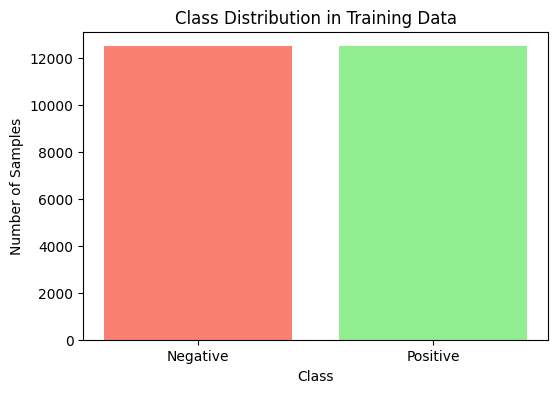

In [ ]:
# Visualization: Class distribution in the training set
unique, counts = np.unique(train_labels, return_counts=True)
plt.figure(figsize=(6,4))
plt.bar(unique, counts, color=['salmon', 'lightgreen'])
plt.xticks(unique, ['Negative', 'Positive'])
plt.title('Class Distribution in Training Data')
plt.xlabel('Class')
plt.ylabel('Number of Samples')
plt.show()

Sample of review word counts:
   Review Index  Word Count
0             0         214
1             1         184
2             2         138
3             3         526
4             4         145


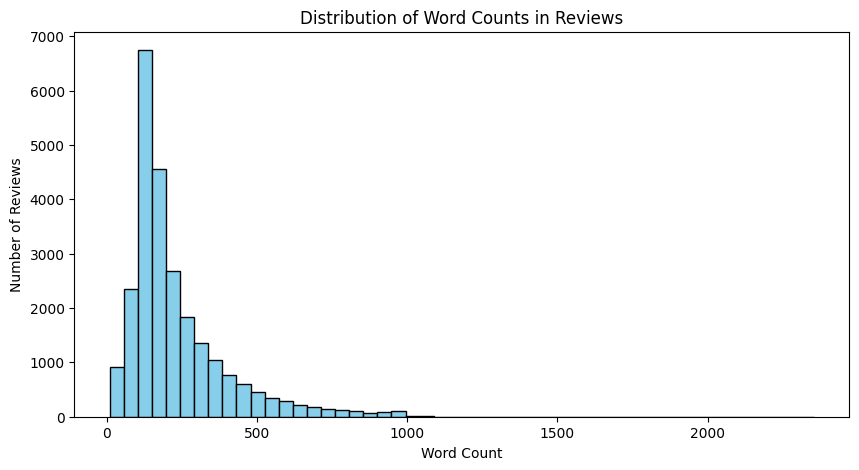

In [ ]:
# Word count per review visualization
review_word_counts = [
    len([index_to_word[idx-3] for idx in review if (idx-3) in index_to_word])
    for review in train_data
]

df_word_counts = pd.DataFrame({
    'Review Index': range(len(review_word_counts)),
    'Word Count': review_word_counts
})

print("Sample of review word counts:")
print(df_word_counts.head())

plt.figure(figsize=(10, 5))
plt.hist(review_word_counts, bins=50, color='skyblue', edgecolor='black')
plt.title('Distribution of Word Counts in Reviews')
plt.xlabel('Word Count')
plt.ylabel('Number of Reviews')
plt.show()


###Preparing the dataset


In [ ]:
# Find and store the length of the longest review in the dataset
max_train_length = max (len(review) for review in train_data)
max_test_length = max (len(review) for review in test_data)

max_length = max(max_train_length, max_test_length)
print("Maximum length of a review in dataset:", max_length)

Maximum length of a review in dataset: 2494


In [ ]:
from keras.preprocessing.sequence import pad_sequences

# Pad each review in the dataset till their length = max_length
print("Padding the reviews...")
train_data = pad_sequences (train_data, maxlen=max_length)
test_data = pad_sequences (test_data, maxlen=max_length)

print("Shape of train_data =", train_data.shape)
print("Shape of test_data  =", test_data.shape)

Padding the reviews...
Shape of train_data = (25000, 2494)
Shape of test_data  = (25000, 2494)


###Building LSTM Model


In [ ]:
from keras.models import Sequential
from keras.layers import LSTM, Embedding, Dense, Dropout
from keras.regularizers import l2

model = Sequential()
model.add(Embedding(input_dim=VOCAB_SIZE, output_dim=32, input_shape=(MAX_LENGTH,)))
model.add(LSTM(units=128,
               activation = 'tanh',
               recurrent_activation = 'sigmoid',
               dropout = 0.0,
               recurrent_dropout = 0.0,
               return_sequences = False,
            ))
model.add(Dense(units = 64,
                activation = 'relu'))
model.add(Dropout(0.3))
model.add(Dense(units = 32,
                activation = 'relu'))
model.add(Dense(units = 1,
                activation = 'sigmoid'))

model.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding (Embedding)                │ (None, None, 32)            │         640,000 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm (LSTM)                          │ (None, 128)                 │          82,432 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 1)                   │              33 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 732,801 (2.80 MB)

 Trainable params: 732,801 (2.80 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
model.compile(optimizer = 'adam',
              loss = 'binary_crossentropy',
              metrics = ['acc'])

### Training LSTM model

In [ ]:
from keras.callbacks import ModelCheckpoint, EarlyStopping, LearningRateScheduler, ReduceLROnPlateau, TerminateOnNaN

callback_list = [
                 ModelCheckpoint(
                     filepath = '/content/best_LSTMmodel.keras',
                     monitor = 'val_acc',
                     verbose = 1,
                     save_best_only = True,
                     save_weights_only = False,
                     mode = 'max',
                     save_freq='epoch'
                 ),

                 EarlyStopping(
                    monitor = 'val_acc',
                    patience = 10,
                    verbose = 1,
                    mode = 'max',
                    baseline = 0.5,
                    restore_best_weights = True
                 ),

                 ReduceLROnPlateau(
                     monitor = 'val_loss',
                     factor = 0.2,
                     patience = 5,
                     verbose = 1,
                     mode = 'min',
                     cooldown = 1,
                     min_lr = 0,
                 ),

                 TerminateOnNaN()
]

In [ ]:
history = model.fit(train_data,
                    train_labels,
                    batch_size = 64,
                    epochs = 100,
                    verbose = 1,
                    callbacks = callback_list,
                    validation_split = 0.10,
                    shuffle = True)

Epoch 1/100
352/352 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step - acc: 0.6314 - loss: 0.6146
Epoch 1: val_acc improved from -inf to 0.74640, saving model to /content/best_LSTMmodel.keras
352/352 ━━━━━━━━━━━━━━━━━━━━ 44s 105ms/step - acc: 0.6317 - loss: 0.6143 - val_acc: 0.7464 - val_loss: 0.4924 - learning_rate: 0.0010
Epoch 2/100
352/352 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step - acc: 0.8520 - loss: 0.3485
Epoch 2: val_acc improved from 0.74640 to 0.87120, saving model to /content/best_LSTMmodel.keras
352/352 ━━━━━━━━━━━━━━━━━━━━ 33s 94ms/step - acc: 0.8520 - loss: 0.3484 - val_acc: 0.8712 - val_loss: 0.3214 - learning_rate: 0.0010
Epoch 3/100
352/352 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step - acc: 0.9331 - loss: 0.1858
Epoch 3: val_acc improved from 0.87120 to 0.87480, saving model to /content/best_LSTMmodel.keras
352/352 ━━━━━━━━━━━━━━━━━━━━ 42s 98ms/step - acc: 0.9330 - loss: 0.1858 - val_acc: 0.8748 - val_loss: 0.3934 - learning_rate: 0.0010
Epoch 4/100
352/352 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step - acc: 0

In [ ]:
print("Best Validation Accuracy =", max(history.history['val_acc'])*100)
print("Best Training Accuracy   =", max(history.history['acc'])*100)

Best Validation Accuracy = 88.23999762535095
Best Training Accuracy   = 99.97333288192749


### Plotting the results

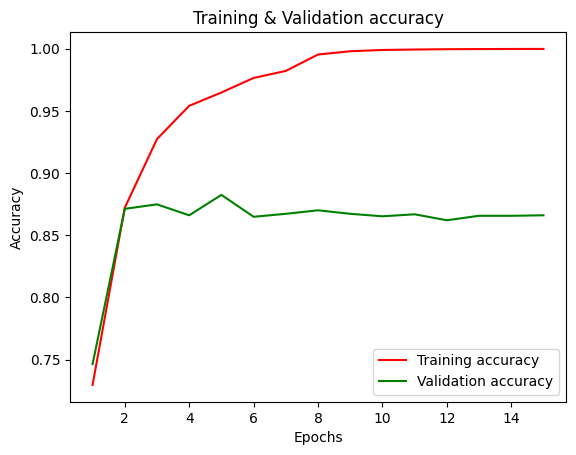

In [ ]:
import matplotlib.pyplot as plt

# Plot LSTM accuracy
train_acc = history.history['acc']
val_acc = history.history['val_acc']

epochs = range(1, len(train_acc) + 1)

plt.plot(epochs, train_acc, 'r-', label='Training accuracy')
plt.plot(epochs, val_acc, 'g-', label='Validation accuracy')
plt.title('Training & Validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

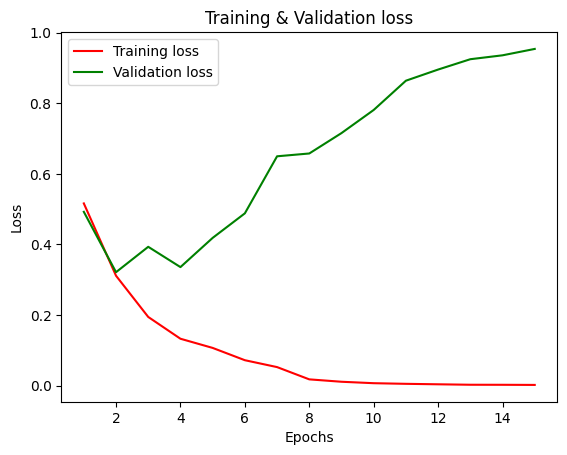

In [ ]:
# Plot LSTM loss
train_loss = history.history['loss']
val_loss = history.history['val_loss']

plt.plot(epochs, train_loss, 'r-', label="Training loss")
plt.plot(epochs, val_loss, 'g-', label='Validation loss')
plt.title('Training & Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

### Testing Model

In [ ]:
test_metrics = model.evaluate(test_data, test_labels)

782/782 ━━━━━━━━━━━━━━━━━━━━ 25s 32ms/step - acc: 0.8558 - loss: 0.5154


In [ ]:
test_accuracy = test_metrics[1]
test_loss = test_metrics[0]
print("Test Accuracy :", test_accuracy)

Test Accuracy : 0.8569599986076355


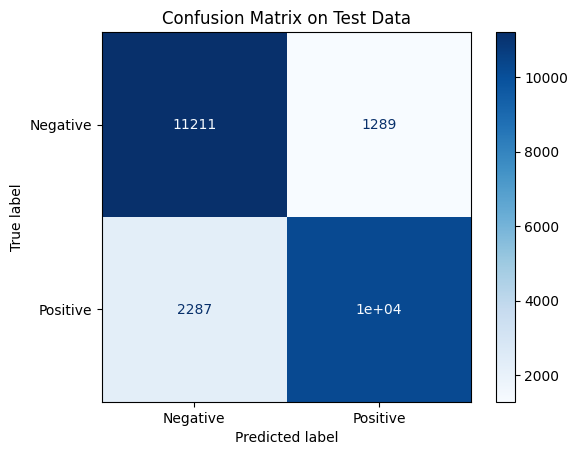

In [ ]:
# Confusion Matrix on the test set
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

test_predictions = model.predict(test_data, verbose=0)
test_predictions_binary = (test_predictions > 0.5).astype(int)

cm = confusion_matrix(test_labels, test_predictions_binary)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Negative', 'Positive'])
disp.plot(cmap='Blues')
plt.title('Confusion Matrix on Test Data')
plt.show()

In [ ]:
# Loading the best LSTM model and using it to predict the Sentiment class of input moview review
from keras.models import load_model
from keras.datasets import imdb
from keras.preprocessing.sequence import pad_sequences

model = load_model ('/content/best_LSTMmodel.keras')

print("Type a movie review :")
input_review = str(input())

word_to_index = imdb.get_word_index()
print("Processing input...")
tokenized_review = [word.lower() for word in input_review.split()]
text_indices = [word_to_index[word]+3 for word in tokenized_review if word in word_to_index.keys()]
model_input = [text_indices]
model_input = pad_sequences (model_input, maxlen = 2494)

print("Running the model with input...")
prediction = model.predict(model_input, verbose = 0)

if (prediction>0.5):
    print("Prediction: Positive")
else:
    print("Prediction: Negative")


Type a movie review :
This was a terrible movie. The plot was predictable, the characters were dull, and the dialogue was cringeworthy. I regret wasting my time watching it.  


Processing input...
Running the model with input...
Prediction: Negative
